<a href="https://colab.research.google.com/github/mkbond777/DTI-meta-learning/blob/master/Result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

In [ ]:
filename1 = '/content/drive/MyDrive/ML-DTI/metrics_2021-10-3005_29_02.387264.csv'

In [ ]:
filename2 = '/content/drive/MyDrive/ML-DTI/metrics_2021-10-3007_21_06.748248.csv'

In [ ]:
filename3 = '/content/drive/MyDrive/ML-DTI/metrics_2021-10-3111_35_48.620823.csv'

In [ ]:
colnames=['target_id','cnn_train_auc','cnn_train_f1_score','cnn_test_auc','cnn_test_f1_score','svm_without_cnn_auc','svm_without_cnn_f1_score','svm_cnn_auc','svm_cnn_f1_score'] 
df1 = pd.read_csv(filename1, names=colnames, header=None)

In [ ]:
df2 = pd.read_csv(filename2, names=colnames, header=None)

In [ ]:
df3 = pd.read_csv(filename3, names=colnames, header=None)

In [ ]:
#df2.info()

In [ ]:
mobile_df = pd.concat([df1,df2,df3])

In [ ]:
mobile_df.reset_index(inplace=True,drop=True)

In [ ]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   target_id                 95 non-null     object 
 1   cnn_train_auc             95 non-null     float64
 2   cnn_train_f1_score        95 non-null     float64
 3   cnn_test_auc              95 non-null     float64
 4   cnn_test_f1_score         95 non-null     float64
 5   svm_without_cnn_auc       95 non-null     float64
 6   svm_without_cnn_f1_score  95 non-null     float64
 7   svm_cnn_auc               95 non-null     float64
 8   svm_cnn_f1_score          95 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.8+ KB


In [ ]:
mobile_df.head()

,target_id,cnn_train_auc,cnn_train_f1_score,cnn_test_auc,cnn_test_f1_score,svm_without_cnn_auc,svm_without_cnn_f1_score,svm_cnn_auc,svm_cnn_f1_score
0,CHEMBL223,0.946045,0.829926,0.893876,0.727273,0.86,0.85,0.85,0.84
1,CHEMBL3473,0.826049,0.828641,0.807348,0.765487,0.87,0.87,0.87,0.87
2,CHEMBL228,0.988463,0.960860,0.830764,0.829517,0.80,0.86,0.77,0.84
3,CHEMBL276,0.890720,0.865209,0.771907,0.754967,0.83,0.83,0.83,0.83
4,CHEMBL3568,0.960940,0.686431,0.799158,0.587302,0.76,0.83,0.77,0.82


In [ ]:
mobile_df.describe()

,cnn_train_auc,cnn_train_f1_score,cnn_test_auc,cnn_test_f1_score,svm_without_cnn_auc,svm_without_cnn_f1_score,svm_cnn_auc,svm_cnn_f1_score
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.944668,0.899850,0.871915,0.808632,0.855053,0.864842,0.858211,0.873158
std,0.067662,0.077539,0.074702,0.078632,0.062516,0.055923,0.066476,0.054309
min,0.613506,0.423948,0.604297,0.400000,0.670000,0.640000,0.680000,0.680000
25%,0.938828,0.877980,0.821861,0.765722,0.820000,0.830000,0.815000,0.840000
50%,0.971518,0.920082,0.890337,0.813084,0.860000,0.870000,0.870000,0.880000
75%,0.986674,0.944869,0.932244,0.861599,0.900000,0.905000,0.910000,0.910000
max,0.999007,0.989862,0.983444,0.948340,0.960000,0.960000,0.970000,0.960000


In [ ]:
#result['target_id'].tolist()

## SVM_WITHOUT_CNN vs SVM_CNN

In [ ]:
#comapring auc of svm with and without cnn output
len(mobile_df[mobile_df['svm_without_cnn_auc'] < mobile_df['svm_cnn_auc']]) / len(mobile_df)

0.4421052631578947

In [ ]:
#comapring f1-score of svm with and without cnn output
len(mobile_df[mobile_df['svm_without_cnn_f1_score'] < mobile_df['svm_cnn_f1_score']]) / len(mobile_df)

0.49473684210526314

## mobilenet vs SVM

In [ ]:
#comapring f1-score of svm and cnn
len(mobile_df[mobile_df['svm_without_cnn_f1_score'] < mobile_df['cnn_test_f1_score']]) / len(mobile_df)

0.14736842105263157

In [ ]:
#comapring f1-score of svm and cnn
len(mobile_df[mobile_df['svm_without_cnn_auc'] < mobile_df['cnn_test_auc']]) / len(mobile_df)

0.7263157894736842

### Inferences 

Result for 73 data points having image size between 1000 and 3000
- In 56% of cases svm without CNN is giving better result
- F1 score is almost similar with and without CNN 

- SVM's F1 score is better than CNN model in 84% of cases
- SVM's AUC score is better than CNN model in only 26% of cases

Result for 94 data points having image size between 1000 and 3000
- In 56% of cases svm without CNN is giving better result
- F1 score is almost similar with and without CNN 

- SVM's F1 score is better than CNN model in 85.5% of cases
- SVM's AUC score is better than CNN model in only 27.5% of cases

# Main Analysis starts here

## Custom CNN analysis

In [ ]:
mypath = '/content/drive/MyDrive/ML-DTI/'

In [ ]:
def concat_df (df_list):
  result = pd.concat(df_list)
  result.reset_index(inplace=True,drop=True)
  return result

In [ ]:
def custom_metrics_df(mypath,colnames, file_str = 'custom'):
  custom_df = []
  for f in listdir(mypath):
    if isfile(join(mypath, f)): 
      if file_str in f:
        df = pd.read_csv(join(mypath, f), names=colnames, header=None)
        custom_df.append(df)

  agg_custom_df = concat_df(custom_df)
 
  return agg_custom_df

In [ ]:
colnames = ['target_id','custom_train_acc','custom_train_auc','custom_train_f1_score','custom_test_acc','custom_test_auc','custom_test_f1_score','svm_custom_acc','svm_custom_auc','svm_custom_f1_score']

In [ ]:
custom_df = custom_metrics_df(mypath, colnames)

In [ ]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_id              95 non-null     object 
 1   custom_train_acc       95 non-null     float64
 2   custom_train_auc       95 non-null     float64
 3   custom_train_f1_score  95 non-null     float64
 4   custom_test_acc        95 non-null     float64
 5   custom_test_auc        95 non-null     float64
 6   custom_test_f1_score   95 non-null     float64
 7   svm_custom_acc         95 non-null     float64
 8   svm_custom_auc         95 non-null     float64
 9   svm_custom_f1_score    95 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.5+ KB


In [ ]:
custom_df.drop_duplicates('target_id',inplace=True)
custom_df.reset_index(drop=True,inplace=True)

In [ ]:
custom_df['target_id'].nunique()

95

In [ ]:
custom_df.columns

Index(['target_id', 'custom_train_acc', 'custom_train_auc',
       'custom_train_f1_score', 'custom_test_acc', 'custom_test_auc',
       'custom_test_f1_score', 'svm_custom_acc', 'svm_custom_auc',
       'svm_custom_f1_score'],
      dtype='object')

## Accuracy analysis

In [ ]:
def metrics_df(mypath,vgg_colnames, inception_colnames, mobilenet_colnames, vgg_str = 'vgg16',incep_str= 'inception', mobilenet_str = None):
  vgg_df = []
  inception_df = []
  mobilenet_df = []
  for f in listdir(mypath):
    if isfile(join(mypath, f)): 
      if vgg_str in f:
        df = pd.read_csv(join(mypath, f), names=vgg_colnames, header=None)
        vgg_df.append(df)
      if incep_str in f:
        df = pd.read_csv(join(mypath, f), names=inception_colnames, header=None)
        inception_df.append(df)
      if mobilenet_str is not None and mobilenet_str in f:
        df = pd.read_csv(join(mypath, f), names=mobilenet_colnames, header=None)
        mobilenet_df.append(df)

  agg_vgg_df = concat_df(vgg_df)
  agg_inception_df = concat_df (inception_df)

  if mobilenet_str is not None:
    agg_mobilenet_df = concat_df (mobilenet_df)
    return agg_vgg_df, agg_inception_df, agg_mobilenet_df
  else:
    return agg_vgg_df, agg_inception_df

In [ ]:
vgg_acc_colnames = ['target_id','vgg_train_acc','vgg_test_acc','svm_acc','svm_vgg_acc']
inception_acc_colnames = ['target_id','inc_train_acc','inc_test_acc','svm_acc','svm_inc_acc']
mobile_acc_colnames = ['target_id','mob_train_acc','mob_test_acc','svm_mob_acc']

In [ ]:
vgg_df, inception_df, mobilenet_df = metrics_df(mypath, vgg_acc_colnames, inception_acc_colnames, mobile_acc_colnames, 'v_accuracy', 'i_accuracy', 'M_accuracy')

In [ ]:
vgg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   target_id      95 non-null     object 
 1   vgg_train_acc  95 non-null     float64
 2   vgg_test_acc   95 non-null     float64
 3   svm_acc        95 non-null     float64
 4   svm_vgg_acc    95 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


In [ ]:
vgg_df['target_id'].nunique()

95

In [ ]:
inception_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   target_id      97 non-null     object 
 1   inc_train_acc  97 non-null     float64
 2   inc_test_acc   97 non-null     float64
 3   svm_acc        97 non-null     float64
 4   svm_inc_acc    97 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [ ]:
inception_df.drop_duplicates('target_id',inplace=True)
inception_df.reset_index(drop=True,inplace=True)

In [ ]:
inception_df['target_id'].nunique()

95

In [ ]:
mobilenet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   target_id      95 non-null     object 
 1   mob_train_acc  95 non-null     float64
 2   mob_test_acc   95 non-null     float64
 3   svm_mob_acc    95 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [ ]:
mobilenet_df['target_id'].nunique()

95

## Inferences

In [ ]:
inception_df.drop('svm_acc',axis=1,inplace=True)
joined_df = inception_df.merge(vgg_df,on='target_id',how='inner')

In [ ]:
joined_df.head()

,target_id,inc_train_acc,inc_test_acc,svm_inc_acc,vgg_train_acc,vgg_test_acc,svm_acc,svm_vgg_acc
0,CHEMBL223,0.842479,0.742798,0.86,0.828276,0.802469,0.86,0.87
1,CHEMBL3473,0.851010,0.801075,0.90,0.894781,0.841398,0.87,0.90
2,CHEMBL228,0.633572,0.614379,0.82,0.906858,0.761438,0.82,0.80
3,CHEMBL276,0.799071,0.722222,0.84,0.702671,0.611111,0.83,0.82
4,CHEMBL3568,0.614790,0.598592,0.80,0.843267,0.718310,0.79,0.80


In [ ]:
#mobilenet_df.info()

In [ ]:
#mobilenet_df['target_id'].tolist()

In [ ]:
final_acc_df = joined_df.merge(mobilenet_df,on='target_id',how='inner')

In [ ]:
final_acc_df_with_custom = final_acc_df.merge(custom_df[['target_id','custom_train_acc','custom_test_acc','svm_custom_acc']],on='target_id',how='inner')

In [ ]:
final_acc_df_with_custom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target_id         95 non-null     object 
 1   inc_train_acc     95 non-null     float64
 2   inc_test_acc      95 non-null     float64
 3   svm_inc_acc       95 non-null     float64
 4   vgg_train_acc     95 non-null     float64
 5   vgg_test_acc      95 non-null     float64
 6   svm_acc           95 non-null     float64
 7   svm_vgg_acc       95 non-null     float64
 8   mob_train_acc     95 non-null     float64
 9   mob_test_acc      95 non-null     float64
 10  svm_mob_acc       95 non-null     float64
 11  custom_train_acc  95 non-null     float64
 12  custom_test_acc   95 non-null     float64
 13  svm_custom_acc    95 non-null     float64
dtypes: float64(13), object(1)
memory usage: 11.1+ KB


In [ ]:
final_acc_df_with_custom[['inc_train_acc','vgg_train_acc','mob_train_acc','custom_train_acc']].idxmax(axis=1).value_counts()

custom_train_acc    61
vgg_train_acc       18
mob_train_acc        8
inc_train_acc        8
dtype: int64

- In training set custom model performed better than Inception, mobilenet and VGG16. I think custom CNN in overfitting and hence require better hyper-parameter tuning.

In [ ]:
final_acc_df_with_custom[['inc_test_acc','vgg_test_acc','mob_test_acc','svm_acc','custom_test_acc']].idxmax(axis=1).value_counts()

svm_acc            86
vgg_test_acc        7
custom_test_acc     2
dtype: int64

- Among the inception, vgg, mobilenet, custom and vaniall SVM, the vanilla SVM given best result in 88 out of 95 cases for accuracy 

In [ ]:
final_acc_df_with_custom[['svm_inc_acc','svm_vgg_acc','svm_mob_acc','svm_acc','svm_custom_acc']].idxmax(axis=1).value_counts()

svm_inc_acc       36
svm_vgg_acc       28
svm_mob_acc       18
svm_acc            8
svm_custom_acc     5
dtype: int64

- Adding inception output helped improve vanilla SVM acc metrics

## Reading VGG and inception_V3 metrics

In [ ]:
vgg_files = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and 'vgg16' in f]

In [ ]:
vgg_files

['/content/drive/MyDrive/ML-DTI/metrics_vgg16_2021-11-0209_46_07.851917.csv',
 '/content/drive/MyDrive/ML-DTI/metrics_vgg16_2021-11-0304_45_32.574222.csv',
 '/content/drive/MyDrive/ML-DTI/metrics_vgg16_2021-11-0309_05_02.537669.csv',
 '/content/drive/MyDrive/ML-DTI/metrics_vgg16_2021-11-0107_34_45.178191.csv']

In [ ]:
inception_files = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and 'inception' in f]

In [ ]:
inception_files

['/content/drive/MyDrive/ML-DTI/metrics_inception_2021-11-0209_39_59.188293.csv',
 '/content/drive/MyDrive/ML-DTI/metrics_inception_2021-11-0304_42_44.816329.csv',
 '/content/drive/MyDrive/ML-DTI/metrics_inception_2021-11-0307_22_03.459554.csv',
 '/content/drive/MyDrive/ML-DTI/metrics_inception_2021-11-0107_59_08.019135.csv']

In [ ]:
vgg_colnames = ['target_id','vgg_train_auc','vgg_train_f1_score','vgg_test_auc','vgg_test_f1_score','svm_vgg_auc','svm_vgg_f1_score']
inception_colnames = ['target_id','inc_train_auc','inc_train_f1_score','inc_test_auc','inc_test_f1_score','svm_inc_auc','svm_inc_f1_score']

In [ ]:
vgg_df, inception_df = metrics_df(mypath,vgg_colnames,inception_colnames,None)

In [ ]:
vgg_df.head()

,target_id,vgg_train_auc,vgg_train_f1_score,vgg_test_auc,vgg_test_f1_score,svm_vgg_auc,svm_vgg_f1_score
0,CHEMBL321,0.908664,0.877672,0.782040,0.806452,0.77,0.84
1,CHEMBL1835,0.917170,0.865759,0.842992,0.771930,0.90,0.90
2,CHEMBL313,0.924878,0.904937,0.784375,0.827068,0.78,0.86
3,CHEMBL2047,0.738556,0.790295,0.709725,0.700637,0.82,0.80
4,CHEMBL1801,0.920085,0.865772,0.812960,0.745098,0.80,0.80


In [ ]:
vgg_df['target_id'].nunique()

95

In [ ]:
inception_df.head()

,target_id,inc_train_auc,inc_train_f1_score,inc_test_auc,inc_test_f1_score,svm_inc_auc,svm_inc_f1_score
0,CHEMBL1991,0.931444,0.867089,0.841955,0.776204,0.82,0.82
1,CHEMBL331,0.988528,0.959318,0.957162,0.879012,0.92,0.92
2,CHEMBL1821,0.964801,0.922124,0.800995,0.742671,0.78,0.78
3,CHEMBL4908,0.995335,0.976178,0.974613,0.939226,0.95,0.95
4,CHEMBL1867,0.935569,0.884488,0.826666,0.765432,0.84,0.83


In [ ]:
inception_df['target_id'].nunique()

95

## Joining mobilenet, vgg, inception, custom CNN and SVM auc, acc and f1-score metrics i.e. everything

In [ ]:
joined_df = inception_df.merge(vgg_df,on='target_id',how='inner')

In [ ]:
joined_df.head()

,target_id,inc_train_auc,inc_train_f1_score,inc_test_auc,inc_test_f1_score,svm_inc_auc,svm_inc_f1_score,vgg_train_auc,vgg_train_f1_score,vgg_test_auc,vgg_test_f1_score,svm_vgg_auc,svm_vgg_f1_score
0,CHEMBL1991,0.931444,0.867089,0.841955,0.776204,0.82,0.82,0.967203,0.925072,0.865865,0.790698,0.83,0.83
1,CHEMBL331,0.988528,0.959318,0.957162,0.879012,0.92,0.92,0.961725,0.924348,0.909158,0.868932,0.91,0.90
2,CHEMBL1821,0.964801,0.922124,0.800995,0.742671,0.78,0.78,0.907401,0.854795,0.804349,0.740214,0.84,0.84
3,CHEMBL4908,0.995335,0.976178,0.974613,0.939226,0.95,0.95,0.988710,0.957564,0.975753,0.940325,0.95,0.95
4,CHEMBL1867,0.935569,0.884488,0.826666,0.765432,0.84,0.83,0.587609,0.683002,0.569442,0.596206,0.81,0.81


In [ ]:
final_df = joined_df.merge(mobile_df, on='target_id',how='inner')

In [ ]:
final_df_with_custom = final_df.merge(custom_df[['target_id', 'custom_train_auc',
       'custom_train_f1_score', 'custom_test_auc',
       'custom_test_f1_score', 'svm_custom_auc',
       'svm_custom_f1_score']], on='target_id',how='inner')

In [ ]:
final_acc_df_with_custom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target_id         95 non-null     object 
 1   inc_train_acc     95 non-null     float64
 2   inc_test_acc      95 non-null     float64
 3   svm_inc_acc       95 non-null     float64
 4   vgg_train_acc     95 non-null     float64
 5   vgg_test_acc      95 non-null     float64
 6   svm_acc           95 non-null     float64
 7   svm_vgg_acc       95 non-null     float64
 8   mob_train_acc     95 non-null     float64
 9   mob_test_acc      95 non-null     float64
 10  svm_mob_acc       95 non-null     float64
 11  custom_train_acc  95 non-null     float64
 12  custom_test_acc   95 non-null     float64
 13  svm_custom_acc    95 non-null     float64
dtypes: float64(13), object(1)
memory usage: 11.1+ KB


In [ ]:
final_df_with_custom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   target_id                 95 non-null     object 
 1   inc_train_auc             95 non-null     float64
 2   inc_train_f1_score        95 non-null     float64
 3   inc_test_auc              95 non-null     float64
 4   inc_test_f1_score         95 non-null     float64
 5   svm_inc_auc               95 non-null     float64
 6   svm_inc_f1_score          95 non-null     float64
 7   vgg_train_auc             95 non-null     float64
 8   vgg_train_f1_score        95 non-null     float64
 9   vgg_test_auc              95 non-null     float64
 10  vgg_test_f1_score         95 non-null     float64
 11  svm_vgg_auc               95 non-null     float64
 12  svm_vgg_f1_score          95 non-null     float64
 13  cnn_train_auc             95 non-null     float64
 14  cnn_train_f1

In [ ]:
full_final_df = final_df_with_custom.merge(final_acc_df_with_custom, on='target_id',how='inner')

In [ ]:
full_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   target_id                 95 non-null     object 
 1   inc_train_auc             95 non-null     float64
 2   inc_train_f1_score        95 non-null     float64
 3   inc_test_auc              95 non-null     float64
 4   inc_test_f1_score         95 non-null     float64
 5   svm_inc_auc               95 non-null     float64
 6   svm_inc_f1_score          95 non-null     float64
 7   vgg_train_auc             95 non-null     float64
 8   vgg_train_f1_score        95 non-null     float64
 9   vgg_test_auc              95 non-null     float64
 10  vgg_test_f1_score         95 non-null     float64
 11  svm_vgg_auc               95 non-null     float64
 12  svm_vgg_f1_score          95 non-null     float64
 13  cnn_train_auc             95 non-null     float64
 14  cnn_train_f1

In [ ]:
full_final_df.head()

,target_id,inc_train_auc,inc_train_f1_score,inc_test_auc,inc_test_f1_score,svm_inc_auc,svm_inc_f1_score,vgg_train_auc,vgg_train_f1_score,vgg_test_auc,vgg_test_f1_score,svm_vgg_auc,svm_vgg_f1_score,cnn_train_auc,cnn_train_f1_score,cnn_test_auc,cnn_test_f1_score,svm_without_cnn_auc,svm_without_cnn_f1_score,svm_cnn_auc,svm_cnn_f1_score,custom_train_auc,custom_train_f1_score,custom_test_auc,custom_test_f1_score,svm_custom_auc,svm_custom_f1_score,inc_train_acc,inc_test_acc,svm_inc_acc,vgg_train_acc,vgg_test_acc,svm_acc,svm_vgg_acc,mob_train_acc,mob_test_acc,svm_mob_acc,custom_train_acc,custom_test_acc,svm_custom_acc
0,CHEMBL1991,0.931444,0.867089,0.841955,0.776204,0.82,0.82,0.967203,0.925072,0.865865,0.790698,0.83,0.83,0.937740,0.884194,0.863356,0.804665,0.86,0.85,0.85,0.85,0.597889,0.761959,0.516609,0.666667,0.86,0.85,0.685373,0.691176,0.85,0.835327,0.794118,0.86,0.87,0.524379,0.602941,0.86,0.615455,0.500000,0.86
1,CHEMBL331,0.988528,0.959318,0.957162,0.879012,0.92,0.92,0.961725,0.924348,0.909158,0.868932,0.91,0.90,0.982891,0.938608,0.958553,0.877660,0.91,0.90,0.92,0.91,0.999137,0.986337,0.929436,0.859903,0.94,0.94,0.896032,0.878173,0.92,0.888095,0.883249,0.91,0.92,0.883333,0.865482,0.91,0.983333,0.852792,0.94
2,CHEMBL1821,0.964801,0.922124,0.800995,0.742671,0.78,0.78,0.907401,0.854795,0.804349,0.740214,0.84,0.84,0.835132,0.818704,0.774043,0.733333,0.81,0.81,0.81,0.80,0.501564,0.762409,0.455831,0.666667,0.81,0.81,0.671658,0.650685,0.83,0.758289,0.708904,0.81,0.85,0.592513,0.626712,0.82,0.616043,0.500000,0.81
3,CHEMBL4908,0.995335,0.976178,0.974613,0.939226,0.95,0.95,0.988710,0.957564,0.975753,0.940325,0.95,0.95,0.999007,0.986232,0.983444,0.948340,0.94,0.94,0.96,0.96,1.000000,0.996438,0.962404,0.934334,0.95,0.95,0.944023,0.921933,0.95,0.952770,0.933086,0.94,0.94,0.955685,0.929368,0.94,0.995918,0.934944,0.95
4,CHEMBL1867,0.935569,0.884488,0.826666,0.765432,0.84,0.83,0.587609,0.683002,0.569442,0.596206,0.81,0.81,0.939917,0.890068,0.849350,0.798867,0.81,0.81,0.85,0.86,0.998497,0.999203,0.772096,0.718841,0.75,0.75,0.619512,0.605590,0.81,0.761951,0.667702,0.81,0.81,0.729756,0.689441,0.82,0.999024,0.698758,0.75


In [ ]:
full_final_df.reset_index(inplace=True)

## Full_final_df comparison without accuracy

In [ ]:
final_df_with_custom[['inc_train_auc','vgg_train_auc','cnn_train_auc','custom_train_auc']].idxmax(axis=1).value_counts()

custom_train_auc    59
inc_train_auc       20
cnn_train_auc       11
vgg_train_auc        5
dtype: int64

- among all the CNN models custom CNN in general performed better on training set

In [ ]:

full_final_df[['inc_train_f1_score','vgg_train_f1_score','cnn_train_f1_score','custom_train_f1_score']].idxmax(axis=1).value_counts()

custom_train_f1_score    57
inc_train_f1_score       22
cnn_train_f1_score       10
vgg_train_f1_score        6
dtype: int64

- among all the CNN models custom CNN in general performed better on training set

In [ ]:
full_final_df[['inc_test_auc','vgg_test_auc','cnn_test_auc','svm_without_cnn_auc','custom_test_auc']].idxmax(axis=1).value_counts()

cnn_test_auc           46
inc_test_auc           18
svm_without_cnn_auc    16
vgg_test_auc           11
custom_test_auc         4
dtype: int64

- among all the CNN models and SVM, mobilenet in general performed better on test set and custom cnn performed worst, so custom CNN is overfitting

In [ ]:
full_final_df[['inc_test_f1_score','vgg_test_f1_score','cnn_test_f1_score','svm_without_cnn_f1_score','custom_test_f1_score']].idxmax(axis=1).value_counts()

svm_without_cnn_f1_score    77
cnn_test_f1_score           12
inc_test_f1_score            3
custom_test_f1_score         2
vgg_test_f1_score            1
dtype: int64

- among all the CNN models and SVM, SVM in general performed better on test set and custom cnn performed poorly, so custom CNN is overfitting

In [ ]:
full_final_df[['svm_inc_auc','svm_vgg_auc','svm_cnn_auc','svm_custom_auc','svm_without_cnn_auc']].idxmax(axis=1).value_counts()

svm_inc_auc            36
svm_vgg_auc            22
svm_cnn_auc            21
svm_custom_auc          8
svm_without_cnn_auc     8
dtype: int64

- Inception boosted the performance of svm 

In [ ]:
full_final_df[['svm_inc_f1_score','svm_vgg_f1_score','svm_cnn_f1_score','svm_custom_f1_score','svm_without_cnn_f1_score']].idxmax(axis=1).value_counts()

svm_inc_f1_score            37
svm_cnn_f1_score            25
svm_vgg_f1_score            23
svm_custom_f1_score          5
svm_without_cnn_f1_score     5
dtype: int64

- Inception boosted the performance of SVM

# Ploting for pre-trained models 

In [ ]:
full_final_df.head()

,index,target_id,inc_train_auc,inc_train_f1_score,inc_test_auc,inc_test_f1_score,svm_inc_auc,svm_inc_f1_score,vgg_train_auc,vgg_train_f1_score,vgg_test_auc,vgg_test_f1_score,svm_vgg_auc,svm_vgg_f1_score,cnn_train_auc,cnn_train_f1_score,cnn_test_auc,cnn_test_f1_score,svm_without_cnn_auc,svm_without_cnn_f1_score,svm_cnn_auc,svm_cnn_f1_score,custom_train_auc,custom_train_f1_score,custom_test_auc,custom_test_f1_score,svm_custom_auc,svm_custom_f1_score,inc_train_acc,inc_test_acc,svm_inc_acc,vgg_train_acc,vgg_test_acc,svm_acc,svm_vgg_acc,mob_train_acc,mob_test_acc,svm_mob_acc,custom_train_acc,custom_test_acc,svm_custom_acc
0,0,CHEMBL1991,0.931444,0.867089,0.841955,0.776204,0.82,0.82,0.967203,0.925072,0.865865,0.790698,0.83,0.83,0.937740,0.884194,0.863356,0.804665,0.86,0.85,0.85,0.85,0.597889,0.761959,0.516609,0.666667,0.86,0.85,0.685373,0.691176,0.85,0.835327,0.794118,0.86,0.87,0.524379,0.602941,0.86,0.615455,0.500000,0.86
1,1,CHEMBL331,0.988528,0.959318,0.957162,0.879012,0.92,0.92,0.961725,0.924348,0.909158,0.868932,0.91,0.90,0.982891,0.938608,0.958553,0.877660,0.91,0.90,0.92,0.91,0.999137,0.986337,0.929436,0.859903,0.94,0.94,0.896032,0.878173,0.92,0.888095,0.883249,0.91,0.92,0.883333,0.865482,0.91,0.983333,0.852792,0.94
2,2,CHEMBL1821,0.964801,0.922124,0.800995,0.742671,0.78,0.78,0.907401,0.854795,0.804349,0.740214,0.84,0.84,0.835132,0.818704,0.774043,0.733333,0.81,0.81,0.81,0.80,0.501564,0.762409,0.455831,0.666667,0.81,0.81,0.671658,0.650685,0.83,0.758289,0.708904,0.81,0.85,0.592513,0.626712,0.82,0.616043,0.500000,0.81
3,3,CHEMBL4908,0.995335,0.976178,0.974613,0.939226,0.95,0.95,0.988710,0.957564,0.975753,0.940325,0.95,0.95,0.999007,0.986232,0.983444,0.948340,0.94,0.94,0.96,0.96,1.000000,0.996438,0.962404,0.934334,0.95,0.95,0.944023,0.921933,0.95,0.952770,0.933086,0.94,0.94,0.955685,0.929368,0.94,0.995918,0.934944,0.95
4,4,CHEMBL1867,0.935569,0.884488,0.826666,0.765432,0.84,0.83,0.587609,0.683002,0.569442,0.596206,0.81,0.81,0.939917,0.890068,0.849350,0.798867,0.81,0.81,0.85,0.86,0.998497,0.999203,0.772096,0.718841,0.75,0.75,0.619512,0.605590,0.81,0.761951,0.667702,0.81,0.81,0.729756,0.689441,0.82,0.999024,0.698758,0.75


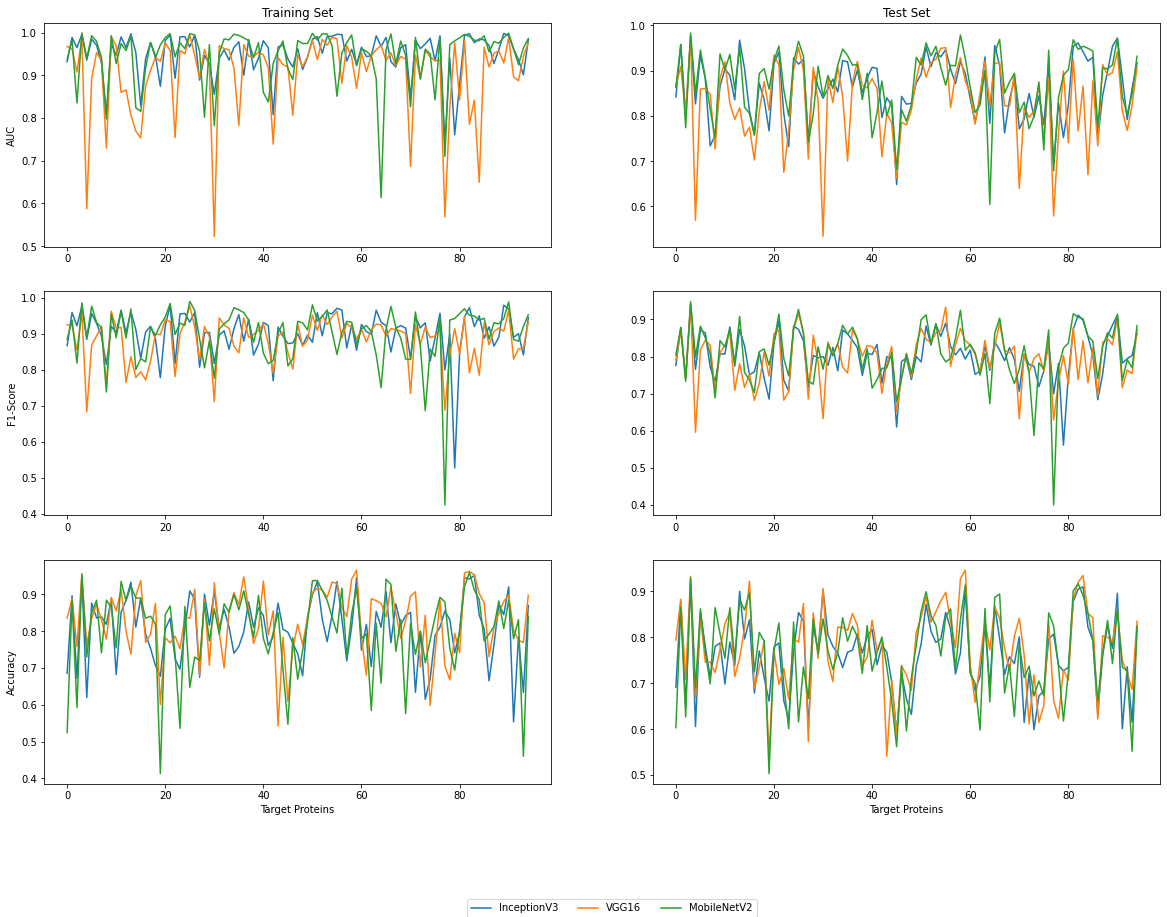

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,14),)

full_final_df.plot(x="index", y=["inc_train_auc", "vgg_train_auc","cnn_train_auc",],ax = axes[0,0],title = 'Training Set', ylabel = 'AUC', xlabel = '', legend=False)


full_final_df.plot(x="index", y=["inc_test_auc", "vgg_test_auc","cnn_test_auc",],ax = axes[0,1],title = 'Test Set',legend=False,xlabel = '' )


full_final_df.plot(x="index", y=["inc_train_f1_score", "vgg_train_f1_score","cnn_train_f1_score",],ax = axes[1,0], ylabel = 'F1-Score',legend=False,xlabel = '')


full_final_df.plot(x="index", y=["inc_test_f1_score", "vgg_test_f1_score","cnn_test_f1_score",],ax = axes[1,1],legend=False,xlabel = '')


full_final_df.plot(x="index", y=["inc_train_acc", "vgg_train_acc","mob_train_acc",],ax = axes[2,0], ylabel = 'Accuracy',legend=False, xlabel = 'Target Proteins')


full_final_df.plot(x="index", y=["inc_test_acc", "vgg_test_acc","mob_test_acc",],ax = axes[2,1],legend=False, xlabel = 'Target Proteins')

fig.legend( ['InceptionV3','VGG16','MobileNetV2'], loc = (0.4, 0), ncol=3 )

In [ ]:
fig.savefig('comp.png',dip=200)

In [ ]:
### Pre-trained model inferences 

In [ ]:
full_final_df[['inc_train_auc','vgg_train_auc','cnn_train_auc',]].idxmax(axis=1).value_counts()

cnn_train_auc    47
inc_train_auc    40
vgg_train_auc     8
dtype: int64

In [ ]:
full_final_df[['inc_test_auc','vgg_test_auc','cnn_test_auc',]].idxmax(axis=1).value_counts()

cnn_test_auc    55
inc_test_auc    23
vgg_test_auc    17
dtype: int64

In [ ]:
full_final_df[["inc_train_f1_score", "vgg_train_f1_score","cnn_train_f1_score",]].idxmax(axis=1).value_counts()

cnn_train_f1_score    42
inc_train_f1_score    40
vgg_train_f1_score    13
dtype: int64

In [ ]:
full_final_df[["inc_test_f1_score", "vgg_test_f1_score","cnn_test_f1_score",]].idxmax(axis=1).value_counts()

cnn_test_f1_score    45
inc_test_f1_score    25
vgg_test_f1_score    25
dtype: int64

In [ ]:
full_final_df[["inc_train_acc", "vgg_train_acc","mob_train_acc",]].idxmax(axis=1).value_counts()

vgg_train_acc    44
mob_train_acc    29
inc_train_acc    22
dtype: int64

In [ ]:
full_final_df[["inc_test_acc", "vgg_test_acc","mob_test_acc",]].idxmax(axis=1).value_counts()

vgg_test_acc    47
mob_test_acc    31
inc_test_acc    17
dtype: int64

In [ ]:
pre_trained_df = full_final_df[['inc_train_auc','vgg_train_auc','cnn_train_auc','inc_test_auc','vgg_test_auc','cnn_test_auc',"inc_train_f1_score", "vgg_train_f1_score","cnn_train_f1_score","inc_test_f1_score", "vgg_test_f1_score","cnn_test_f1_score","inc_train_acc", "vgg_train_acc","mob_train_acc","inc_test_acc", "vgg_test_acc","mob_test_acc"]]

In [ ]:
pre_trained_df.describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9])
#pre_trained_df.describe()

,inc_train_auc,vgg_train_auc,cnn_train_auc,inc_test_auc,vgg_test_auc,cnn_test_auc,inc_train_f1_score,vgg_train_f1_score,cnn_train_f1_score,inc_test_f1_score,vgg_test_f1_score,cnn_test_f1_score,inc_train_acc,vgg_train_acc,mob_train_acc,inc_test_acc,vgg_test_acc,mob_test_acc
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.948114,0.904793,0.944668,0.862850,0.832471,0.871915,0.900917,0.883017,0.899850,0.801919,0.796302,0.808632,0.807276,0.827668,0.803307,0.761392,0.775491,0.765815
std,0.050737,0.094811,0.067662,0.068868,0.089159,0.074702,0.061599,0.062622,0.077539,0.064063,0.070972,0.078632,0.086826,0.089530,0.110761,0.081086,0.090923,0.093832
min,0.738951,0.522784,0.613506,0.648546,0.533878,0.604297,0.527027,0.683002,0.423948,0.561403,0.596206,0.400000,0.553341,0.542230,0.412770,0.592105,0.540230,0.502874
5%,0.841185,0.716662,0.811162,0.746518,0.667825,0.749072,0.812403,0.761679,0.793449,0.704199,0.672843,0.698795,0.655625,0.676168,0.567187,0.611742,0.613661,0.600004
10%,0.890372,0.774668,0.839424,0.764445,0.706917,0.774316,0.831904,0.787015,0.819958,0.730295,0.702882,0.733417,0.677795,0.706269,0.662808,0.639474,0.659690,0.627056
20%,0.927142,0.868445,0.924367,0.800278,0.768263,0.807585,0.866821,0.844136,0.845758,0.753040,0.737178,0.754946,0.739764,0.762390,0.737890,0.691123,0.706289,0.694688
30%,0.938031,0.909163,0.943476,0.835782,0.806923,0.836866,0.888027,0.868939,0.885570,0.774753,0.758632,0.770737,0.773875,0.782568,0.776770,0.722722,0.732447,0.724830
40%,0.946637,0.927126,0.957700,0.845285,0.822190,0.860169,0.898645,0.891397,0.905105,0.793280,0.793036,0.800813,0.805456,0.809056,0.795470,0.741862,0.752679,0.737615
50%,0.964156,0.941712,0.971518,0.871500,0.850154,0.890337,0.908297,0.901309,0.920082,0.803150,0.810219,0.813084,0.812274,0.838762,0.831147,0.770270,0.777533,0.767241


In [ ]:
pre_trained_df['inc_test_train_diff_auc'] = pre_trained_df['inc_train_auc'] - pre_trained_df['inc_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['vgg_test_train_diff_auc'] = pre_trained_df['vgg_train_auc'] - pre_trained_df['vgg_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['mob_test_train_diff_auc'] = pre_trained_df['cnn_train_auc'] - pre_trained_df['cnn_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['inc_test_train_diff_f1_score'] = pre_trained_df['inc_train_f1_score'] - pre_trained_df['inc_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['vgg_test_train_diff_f1_score'] = pre_trained_df['vgg_train_f1_score'] - pre_trained_df['vgg_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['mob_test_train_diff_f1_score'] = pre_trained_df['cnn_train_f1_score'] - pre_trained_df['cnn_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['inc_test_train_diff_acc'] = pre_trained_df['inc_train_acc'] - pre_trained_df['inc_test_acc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['vgg_test_train_diff_acc'] = pre_trained_df['vgg_train_acc'] - pre_trained_df['vgg_test_acc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['mob_test_train_diff_acc'] = pre_trained_df['mob_train_acc'] - pre_trained_df['mob_test_acc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df[['inc_test_train_diff_auc','vgg_test_train_diff_auc','mob_test_train_diff_auc','inc_test_train_diff_f1_score','vgg_test_train_diff_f1_score','mob_test_train_diff_f1_score','inc_test_train_diff_acc','vgg_test_train_diff_acc','mob_test_train_diff_acc']].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.75,.8,.9])

,inc_test_train_diff_auc,vgg_test_train_diff_auc,mob_test_train_diff_auc,inc_test_train_diff_f1_score,vgg_test_train_diff_f1_score,mob_test_train_diff_f1_score,inc_test_train_diff_acc,vgg_test_train_diff_acc,mob_test_train_diff_acc
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.085264,0.072323,0.072752,0.098997,0.086715,0.091218,0.045884,0.052178,0.037492
std,0.054503,0.052923,0.053072,0.044045,0.035748,0.035227,0.043254,0.036511,0.047660
min,0.008367,-0.023989,-0.059797,-0.034376,0.017238,0.007487,-0.047405,-0.047010,-0.091488
10%,0.031936,0.013959,0.016818,0.048392,0.050373,0.048630,-0.001464,0.012227,-0.017366
20%,0.042753,0.032933,0.029422,0.072944,0.057358,0.062357,0.014208,0.024378,0.001615
30%,0.051852,0.044665,0.042793,0.082564,0.062629,0.074398,0.020669,0.034092,0.020692
40%,0.061414,0.052089,0.051357,0.089052,0.073312,0.080813,0.026414,0.041817,0.032979
50%,0.069422,0.065844,0.064120,0.096234,0.081230,0.088938,0.043431,0.050390,0.039686
60%,0.082484,0.078033,0.075275,0.103162,0.092652,0.101458,0.047832,0.057183,0.044846


# Ploting for pre-trained + Custom models 

In [ ]:
full_final_df.head()

,index,target_id,inc_train_auc,inc_train_f1_score,inc_test_auc,inc_test_f1_score,svm_inc_auc,svm_inc_f1_score,vgg_train_auc,vgg_train_f1_score,vgg_test_auc,vgg_test_f1_score,svm_vgg_auc,svm_vgg_f1_score,cnn_train_auc,cnn_train_f1_score,cnn_test_auc,cnn_test_f1_score,svm_without_cnn_auc,svm_without_cnn_f1_score,svm_cnn_auc,svm_cnn_f1_score,custom_train_auc,custom_train_f1_score,custom_test_auc,custom_test_f1_score,svm_custom_auc,svm_custom_f1_score,inc_train_acc,inc_test_acc,svm_inc_acc,vgg_train_acc,vgg_test_acc,svm_acc,svm_vgg_acc,mob_train_acc,mob_test_acc,svm_mob_acc,custom_train_acc,custom_test_acc,svm_custom_acc
0,0,CHEMBL1991,0.931444,0.867089,0.841955,0.776204,0.82,0.82,0.967203,0.925072,0.865865,0.790698,0.83,0.83,0.937740,0.884194,0.863356,0.804665,0.86,0.85,0.85,0.85,0.597889,0.761959,0.516609,0.666667,0.86,0.85,0.685373,0.691176,0.85,0.835327,0.794118,0.86,0.87,0.524379,0.602941,0.86,0.615455,0.500000,0.86
1,1,CHEMBL331,0.988528,0.959318,0.957162,0.879012,0.92,0.92,0.961725,0.924348,0.909158,0.868932,0.91,0.90,0.982891,0.938608,0.958553,0.877660,0.91,0.90,0.92,0.91,0.999137,0.986337,0.929436,0.859903,0.94,0.94,0.896032,0.878173,0.92,0.888095,0.883249,0.91,0.92,0.883333,0.865482,0.91,0.983333,0.852792,0.94
2,2,CHEMBL1821,0.964801,0.922124,0.800995,0.742671,0.78,0.78,0.907401,0.854795,0.804349,0.740214,0.84,0.84,0.835132,0.818704,0.774043,0.733333,0.81,0.81,0.81,0.80,0.501564,0.762409,0.455831,0.666667,0.81,0.81,0.671658,0.650685,0.83,0.758289,0.708904,0.81,0.85,0.592513,0.626712,0.82,0.616043,0.500000,0.81
3,3,CHEMBL4908,0.995335,0.976178,0.974613,0.939226,0.95,0.95,0.988710,0.957564,0.975753,0.940325,0.95,0.95,0.999007,0.986232,0.983444,0.948340,0.94,0.94,0.96,0.96,1.000000,0.996438,0.962404,0.934334,0.95,0.95,0.944023,0.921933,0.95,0.952770,0.933086,0.94,0.94,0.955685,0.929368,0.94,0.995918,0.934944,0.95
4,4,CHEMBL1867,0.935569,0.884488,0.826666,0.765432,0.84,0.83,0.587609,0.683002,0.569442,0.596206,0.81,0.81,0.939917,0.890068,0.849350,0.798867,0.81,0.81,0.85,0.86,0.998497,0.999203,0.772096,0.718841,0.75,0.75,0.619512,0.605590,0.81,0.761951,0.667702,0.81,0.81,0.729756,0.689441,0.82,0.999024,0.698758,0.75


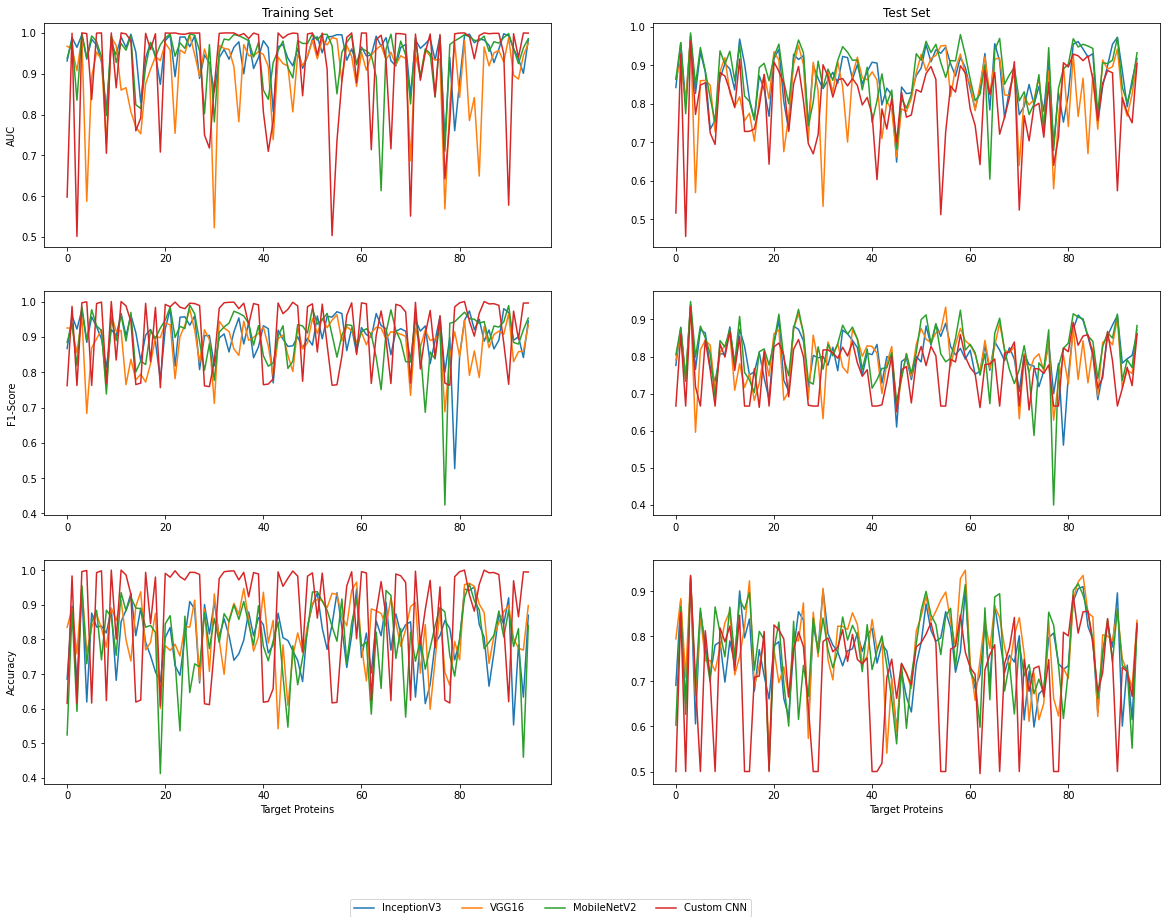

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,14),)

full_final_df.plot(x="index", y=["inc_train_auc", "vgg_train_auc","cnn_train_auc","custom_train_auc"],ax = axes[0,0],title = 'Training Set', ylabel = 'AUC', xlabel = '', legend=False)


full_final_df.plot(x="index", y=["inc_test_auc", "vgg_test_auc","cnn_test_auc","custom_test_auc"],ax = axes[0,1],title = 'Test Set',legend=False,xlabel = '' )


full_final_df.plot(x="index", y=["inc_train_f1_score", "vgg_train_f1_score","cnn_train_f1_score","custom_train_f1_score"],ax = axes[1,0], ylabel = 'F1-Score',legend=False,xlabel = '')


full_final_df.plot(x="index", y=["inc_test_f1_score", "vgg_test_f1_score","cnn_test_f1_score","custom_test_f1_score"],ax = axes[1,1],legend=False,xlabel = '')


full_final_df.plot(x="index", y=["inc_train_acc", "vgg_train_acc","mob_train_acc","custom_train_acc"],ax = axes[2,0], ylabel = 'Accuracy',legend=False, xlabel = 'Target Proteins')


full_final_df.plot(x="index", y=["inc_test_acc", "vgg_test_acc","mob_test_acc","custom_test_acc"],ax = axes[2,1],legend=False, xlabel = 'Target Proteins')

fig.legend( ['InceptionV3','VGG16','MobileNetV2','Custom CNN'], loc = (0.3, 0), ncol=4 )

In [ ]:
### Pre-trained model inferences 

In [ ]:
full_final_df[['inc_train_auc','vgg_train_auc','cnn_train_auc','custom_train_auc']].idxmax(axis=1).value_counts()

custom_train_auc    59
inc_train_auc       20
cnn_train_auc       11
vgg_train_auc        5
dtype: int64

In [ ]:
full_final_df[['inc_test_auc','vgg_test_auc','cnn_test_auc','custom_test_auc']].idxmax(axis=1).value_counts()

cnn_test_auc       53
inc_test_auc       23
vgg_test_auc       14
custom_test_auc     5
dtype: int64

In [ ]:
full_final_df[["inc_train_f1_score", "vgg_train_f1_score","cnn_train_f1_score","custom_train_f1_score"]].idxmax(axis=1).value_counts()

custom_train_f1_score    57
inc_train_f1_score       22
cnn_train_f1_score       10
vgg_train_f1_score        6
dtype: int64

In [ ]:
full_final_df[["inc_test_f1_score", "vgg_test_f1_score","cnn_test_f1_score","custom_test_f1_score"]].idxmax(axis=1).value_counts()

cnn_test_f1_score       41
inc_test_f1_score       23
vgg_test_f1_score       23
custom_test_f1_score     8
dtype: int64

In [ ]:
full_final_df[["inc_train_acc", "vgg_train_acc","mob_train_acc","custom_train_acc"]].idxmax(axis=1).value_counts()

custom_train_acc    61
vgg_train_acc       18
mob_train_acc        8
inc_train_acc        8
dtype: int64

In [ ]:
full_final_df[["inc_test_acc", "vgg_test_acc","mob_test_acc","custom_test_acc"]].idxmax(axis=1).value_counts()

vgg_test_acc       38
mob_test_acc       25
custom_test_acc    20
inc_test_acc       12
dtype: int64

In [ ]:
pre_trained_df = full_final_df[['inc_train_auc','vgg_train_auc','cnn_train_auc','custom_train_auc','inc_test_auc','vgg_test_auc','cnn_test_auc','custom_test_auc',"inc_train_f1_score", "vgg_train_f1_score","cnn_train_f1_score",'custom_train_f1_score',"inc_test_f1_score", "vgg_test_f1_score","cnn_test_f1_score",'custom_test_f1_score',"inc_train_acc", "vgg_train_acc","mob_train_acc",'custom_train_acc',"inc_test_acc", "vgg_test_acc","mob_test_acc",'custom_test_acc']]

In [ ]:
pre_trained_df.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])
#pre_trained_df.describe()

,inc_train_auc,vgg_train_auc,cnn_train_auc,custom_train_auc,inc_test_auc,vgg_test_auc,cnn_test_auc,custom_test_auc,inc_train_f1_score,vgg_train_f1_score,cnn_train_f1_score,custom_train_f1_score,inc_test_f1_score,vgg_test_f1_score,cnn_test_f1_score,custom_test_f1_score,inc_train_acc,vgg_train_acc,mob_train_acc,custom_train_acc,inc_test_acc,vgg_test_acc,mob_test_acc,custom_test_acc
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.948114,0.904793,0.944668,0.919282,0.862850,0.832471,0.871915,0.798533,0.900917,0.883017,0.899850,0.918361,0.801919,0.796302,0.808632,0.765194,0.807276,0.827668,0.803307,0.881195,0.761392,0.775491,0.765815,0.711381
std,0.050737,0.094811,0.067662,0.130100,0.068868,0.089159,0.074702,0.102460,0.061599,0.062622,0.077539,0.094246,0.064063,0.070972,0.078632,0.071024,0.086826,0.089530,0.110761,0.148117,0.081086,0.090923,0.093832,0.120885
min,0.738951,0.522784,0.613506,0.501564,0.648546,0.533878,0.604297,0.455831,0.527027,0.683002,0.423948,0.756152,0.561403,0.596206,0.400000,0.651584,0.553341,0.542230,0.412770,0.607914,0.592105,0.540230,0.502874,0.495327
10%,0.890372,0.774668,0.839424,0.714795,0.764445,0.706917,0.774316,0.679657,0.831904,0.787015,0.819958,0.764641,0.730295,0.702882,0.733417,0.666667,0.677795,0.706269,0.662808,0.618963,0.639474,0.659690,0.627056,0.500000
20%,0.927142,0.868445,0.924367,0.830770,0.800278,0.768263,0.807585,0.726572,0.866821,0.844136,0.845758,0.773201,0.753040,0.737178,0.754946,0.666667,0.739764,0.762390,0.737890,0.651340,0.691123,0.706289,0.694688,0.514493
30%,0.938031,0.909163,0.943476,0.934436,0.835782,0.806923,0.836866,0.764917,0.888027,0.868939,0.885570,0.861067,0.774753,0.758632,0.770737,0.719443,0.773875,0.782568,0.776770,0.845536,0.722722,0.732447,0.724830,0.699324
40%,0.946637,0.927126,0.957700,0.986809,0.845285,0.822190,0.860169,0.791230,0.898645,0.891397,0.905105,0.944034,0.793280,0.793036,0.800813,0.764621,0.805456,0.809056,0.795470,0.929419,0.741862,0.752679,0.737615,0.725053
50%,0.964156,0.941712,0.971518,0.996476,0.871500,0.850154,0.890337,0.816997,0.908297,0.901309,0.920082,0.977951,0.803150,0.810219,0.813084,0.778571,0.812274,0.838762,0.831147,0.971711,0.770270,0.777533,0.767241,0.747619
60%,0.969788,0.947376,0.977631,0.998136,0.892962,0.874747,0.906384,0.847574,0.920953,0.911980,0.931440,0.986787,0.817250,0.828698,0.830841,0.798836,0.836912,0.867787,0.848583,0.982853,0.786497,0.806411,0.800932,0.770734


In [ ]:
pre_trained_df['inc_test_train_diff_auc'] = pre_trained_df['inc_train_auc'] - pre_trained_df['inc_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['vgg_test_train_diff_auc'] = pre_trained_df['vgg_train_auc'] - pre_trained_df['vgg_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['mob_test_train_diff_auc'] = pre_trained_df['cnn_train_auc'] - pre_trained_df['cnn_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['custom_test_train_diff_auc'] = pre_trained_df['custom_train_auc'] - pre_trained_df['custom_test_auc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['inc_test_train_diff_f1_score'] = pre_trained_df['inc_train_f1_score'] - pre_trained_df['inc_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['vgg_test_train_diff_f1_score'] = pre_trained_df['vgg_train_f1_score'] - pre_trained_df['vgg_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['mob_test_train_diff_f1_score'] = pre_trained_df['cnn_train_f1_score'] - pre_trained_df['cnn_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['custom_test_train_diff_f1_score'] = pre_trained_df['custom_train_f1_score'] - pre_trained_df['custom_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['inc_test_train_diff_acc'] = pre_trained_df['inc_train_acc'] - pre_trained_df['inc_test_acc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['vgg_test_train_diff_acc'] = pre_trained_df['vgg_train_acc'] - pre_trained_df['vgg_test_acc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['mob_test_train_diff_acc'] = pre_trained_df['mob_train_acc'] - pre_trained_df['mob_test_acc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df['custom_test_train_diff_f1_score'] = pre_trained_df['custom_train_f1_score'] - pre_trained_df['custom_test_f1_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_trained_df[['inc_test_train_diff_auc','vgg_test_train_diff_auc','mob_test_train_diff_auc','custom_test_train_diff_auc','inc_test_train_diff_f1_score','vgg_test_train_diff_f1_score','mob_test_train_diff_f1_score','custom_test_train_diff_f1_score','inc_test_train_diff_acc','vgg_test_train_diff_acc','mob_test_train_diff_acc','custom_test_train_diff_f1_score']].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.75,.8,.9])

,inc_test_train_diff_auc,vgg_test_train_diff_auc,mob_test_train_diff_auc,custom_test_train_diff_auc,inc_test_train_diff_f1_score,vgg_test_train_diff_f1_score,mob_test_train_diff_f1_score,custom_test_train_diff_f1_score,inc_test_train_diff_acc,vgg_test_train_diff_acc,mob_test_train_diff_acc,custom_test_train_diff_f1_score
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.085264,0.072323,0.072752,0.120749,0.098997,0.086715,0.091218,0.153167,0.045884,0.052178,0.037492,0.153167
std,0.054503,0.052923,0.053072,0.081138,0.044045,0.035748,0.035227,0.065775,0.043254,0.036511,0.047660,0.065775
min,0.008367,-0.023989,-0.059797,-0.032594,-0.034376,0.017238,0.007487,0.014090,-0.047405,-0.047010,-0.091488,0.014090
10%,0.031936,0.013959,0.016818,0.005768,0.048392,0.050373,0.048630,0.089619,-0.001464,0.012227,-0.017366,0.089619
20%,0.042753,0.032933,0.029422,0.047277,0.072944,0.057358,0.062357,0.097398,0.014208,0.024378,0.001615,0.097398
30%,0.051852,0.044665,0.042793,0.069522,0.082564,0.062629,0.074398,0.102257,0.020669,0.034092,0.020692,0.102257
40%,0.061414,0.052089,0.051357,0.094154,0.089052,0.073312,0.080813,0.124518,0.026414,0.041817,0.032979,0.124518
50%,0.069422,0.065844,0.064120,0.119183,0.096234,0.081230,0.088938,0.149449,0.043431,0.050390,0.039686,0.149449
60%,0.082484,0.078033,0.075275,0.142855,0.103162,0.092652,0.101458,0.165790,0.047832,0.057183,0.044846,0.165790


# CNN models vs SVM models

In [ ]:
full_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     95 non-null     int64  
 1   target_id                 95 non-null     object 
 2   inc_train_auc             95 non-null     float64
 3   inc_train_f1_score        95 non-null     float64
 4   inc_test_auc              95 non-null     float64
 5   inc_test_f1_score         95 non-null     float64
 6   svm_inc_auc               95 non-null     float64
 7   svm_inc_f1_score          95 non-null     float64
 8   vgg_train_auc             95 non-null     float64
 9   vgg_train_f1_score        95 non-null     float64
 10  vgg_test_auc              95 non-null     float64
 11  vgg_test_f1_score         95 non-null     float64
 12  svm_vgg_auc               95 non-null     float64
 13  svm_vgg_f1_score          95 non-null     float64
 14  cnn_train_au

In [ ]:
full_final_df['best_cnn_model_train_auc'] = full_final_df[['inc_train_auc','vgg_train_auc','cnn_train_auc','custom_train_auc']].idxmax(axis=1)

In [ ]:
full_final_df['best_cnn_model_train_auc_value'] = full_final_df[['inc_train_auc','vgg_train_auc','cnn_train_auc','custom_train_auc']].max(axis=1)

In [ ]:
full_final_df['best_cnn_model_test_auc'] = full_final_df[['inc_test_auc','vgg_test_auc','cnn_test_auc','custom_test_auc']].idxmax(axis=1)

In [ ]:
full_final_df['best_cnn_model_test_auc_value'] = full_final_df[['inc_test_auc','vgg_test_auc','cnn_test_auc','custom_test_auc']].max(axis=1)

In [ ]:
full_final_df['best_cnn_model_test_f1_score'] = full_final_df[['inc_test_f1_score','vgg_test_f1_score','cnn_test_f1_score','custom_test_f1_score']].idxmax(axis=1)

In [ ]:
full_final_df['best_cnn_model_test_f1_score_value'] = full_final_df[['inc_test_f1_score','vgg_test_f1_score','cnn_test_f1_score','custom_test_f1_score']].max(axis=1)

In [ ]:
full_final_df['best_cnn_model_test_acc'] = full_final_df[['inc_test_acc','vgg_test_acc','mob_test_acc','custom_test_acc']].idxmax(axis=1)

In [ ]:
full_final_df['best_cnn_model_test_acc_value'] = full_final_df[['inc_test_acc','vgg_test_acc','mob_test_acc','custom_test_acc']].max(axis=1)

In [ ]:
full_final_df[['best_cnn_model_test_auc_value','svm_without_cnn_auc']].idxmax(axis=1).value_counts()

best_cnn_model_test_auc_value    79
svm_without_cnn_auc              16
dtype: int64

In [ ]:
full_final_df[['best_cnn_model_test_f1_score_value','svm_without_cnn_f1_score']].idxmax(axis=1).value_counts()

svm_without_cnn_f1_score              77
best_cnn_model_test_f1_score_value    18
dtype: int64

In [ ]:
full_final_df[['best_cnn_model_test_acc_value','svm_acc']].idxmax(axis=1).value_counts()

svm_acc                          86
best_cnn_model_test_acc_value     9
dtype: int64

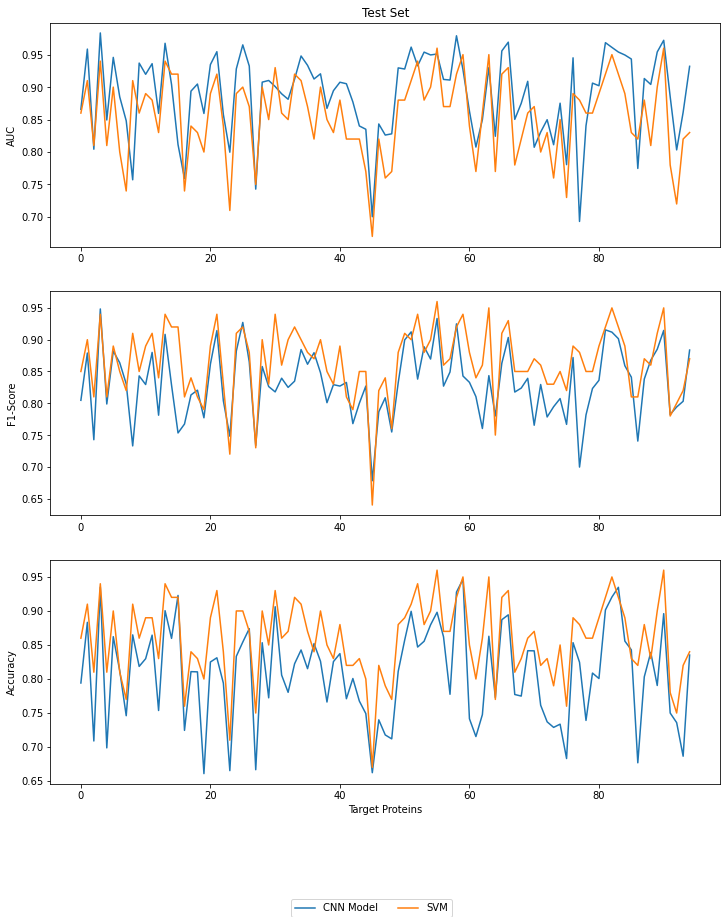

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,14),)

full_final_df.plot(x="index", y=["best_cnn_model_test_auc_value", "svm_without_cnn_auc"],ax = axes[0],title = 'Test Set', ylabel = 'AUC', xlabel = '', legend=False)

full_final_df.plot(x="index", y=['best_cnn_model_test_f1_score_value','svm_without_cnn_f1_score'],ax = axes[1], ylabel = 'F1-Score',legend=False,xlabel = '')

full_final_df.plot(x="index", y=['best_cnn_model_test_acc_value','svm_acc'],ax = axes[2], ylabel = 'Accuracy',legend=False, xlabel = 'Target Proteins')

fig.legend( ['CNN Model','SVM'], loc = (0.4, 0), ncol=2 )

In [ ]:
full_final_df['cnn_svm_auc_diff'] = full_final_df['best_cnn_model_test_auc_value'] - full_final_df['svm_without_cnn_auc']

In [ ]:
full_final_df['cnn_svm_auc_diff'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.033302
std       0.047365
min      -0.186941
10%      -0.013635
20%       0.011929
30%       0.023618
40%       0.032430
50%       0.040875
60%       0.048705
70%       0.054928
80%       0.062677
90%       0.080779
max       0.113265
Name: cnn_svm_auc_diff, dtype: float64

In [ ]:
(full_final_df['svm_without_cnn_f1_score']-full_final_df['best_cnn_model_test_f1_score_value']).describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.033316
std       0.041530
min      -0.038201
10%      -0.010137
20%       0.003113
30%       0.013245
40%       0.021595
50%       0.026916
60%       0.031733
70%       0.042641
80%       0.053304
90%       0.089007
max       0.180330
dtype: float64

In [ ]:
(full_final_df['svm_acc']-full_final_df['best_cnn_model_test_acc_value']).describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.051281
std       0.037475
min      -0.014783
10%       0.003853
20%       0.019128
30%       0.029260
40%       0.037324
50%       0.049008
60%       0.060232
70%       0.068517
80%       0.083984
90%       0.100190
max       0.143171
dtype: float64

## Comparing all 4 meta-learning models

In [ ]:
full_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               95 non-null     int64  
 1   target_id                           95 non-null     object 
 2   inc_train_auc                       95 non-null     float64
 3   inc_train_f1_score                  95 non-null     float64
 4   inc_test_auc                        95 non-null     float64
 5   inc_test_f1_score                   95 non-null     float64
 6   svm_inc_auc                         95 non-null     float64
 7   svm_inc_f1_score                    95 non-null     float64
 8   vgg_train_auc                       95 non-null     float64
 9   vgg_train_f1_score                  95 non-null     float64
 10  vgg_test_auc                        95 non-null     float64
 11  vgg_test_f1_score                   95 non-null

In [ ]:
full_final_df['best_meta_model_auc_value'] = full_final_df[['svm_inc_auc','svm_vgg_auc','svm_cnn_auc','svm_custom_auc']].max(axis=1)

In [ ]:
full_final_df['best_meta_model_f1_score_value'] = full_final_df[['svm_inc_f1_score','svm_vgg_f1_score','svm_cnn_f1_score','svm_custom_f1_score']].max(axis=1)

In [ ]:
full_final_df['best_meta_model_acc_value'] = full_final_df[['svm_inc_acc','svm_vgg_acc','svm_mob_acc','svm_custom_acc']].max(axis=1)

In [ ]:
full_final_df[['best_cnn_model_test_auc_value','svm_without_cnn_auc','best_meta_model_auc_value']].idxmax(axis=1).value_counts()

best_cnn_model_test_auc_value    73
svm_without_cnn_auc              13
best_meta_model_auc_value         9
dtype: int64

In [ ]:
full_final_df[['best_cnn_model_test_f1_score_value','svm_without_cnn_f1_score','best_meta_model_f1_score_value']].idxmax(axis=1).value_counts()

best_meta_model_f1_score_value        68
svm_without_cnn_f1_score              26
best_cnn_model_test_f1_score_value     1
dtype: int64

In [ ]:
full_final_df[['best_cnn_model_test_acc_value','svm_acc','best_meta_model_acc_value']].idxmax(axis=1).value_counts()

best_meta_model_acc_value    75
svm_acc                      20
dtype: int64

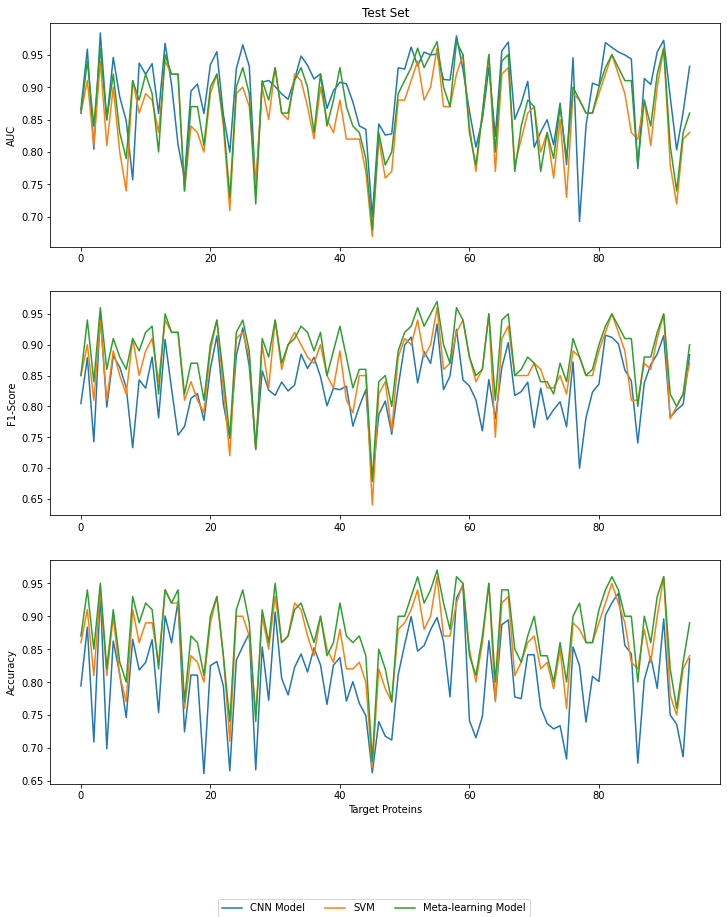

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,14),)

full_final_df.plot(x="index", y=['best_cnn_model_test_auc_value','svm_without_cnn_auc','best_meta_model_auc_value'],ax = axes[0],title = 'Test Set', ylabel = 'AUC', xlabel = '', legend=False)

full_final_df.plot(x="index", y=['best_cnn_model_test_f1_score_value','svm_without_cnn_f1_score','best_meta_model_f1_score_value'],ax = axes[1], ylabel = 'F1-Score',legend=False,xlabel = '')

full_final_df.plot(x="index", y=['best_cnn_model_test_acc_value','svm_acc','best_meta_model_acc_value'],ax = axes[2], ylabel = 'Accuracy',legend=False, xlabel = 'Target Proteins')

fig.legend( ['CNN Model','SVM','Meta-learning Model'], loc = (0.3, 0), ncol=3 )

In [ ]:
(full_final_df['best_meta_model_auc_value']-full_final_df['svm_without_cnn_auc']).describe(percentiles=[.08,.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.015579
std       0.019771
min      -0.040000
8%       -0.004800
10%       0.000000
20%       0.000000
30%       0.010000
40%       0.010000
50%       0.010000
60%       0.020000
70%       0.020000
80%       0.030000
90%       0.040000
max       0.080000
dtype: float64

In [ ]:
(full_final_df['best_cnn_model_test_auc_value']-full_final_df['best_meta_model_auc_value']).describe(percentiles=[.08,.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.017723
std       0.040694
min      -0.186941
8%       -0.022756
10%      -0.019714
20%      -0.000321
30%       0.011330
40%       0.018960
50%       0.023888
60%       0.029909
70%       0.034655
80%       0.041191
90%       0.057692
max       0.082500
dtype: float64

In [ ]:
(full_final_df['best_meta_model_f1_score_value']-full_final_df['svm_without_cnn_f1_score']).describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.018526
std       0.020471
min      -0.020000
5%       -0.003000
10%       0.000000
20%       0.000000
30%       0.010000
40%       0.010000
50%       0.010000
60%       0.020000
70%       0.030000
80%       0.040000
90%       0.040000
max       0.100000
dtype: float64

In [ ]:
(full_final_df['best_meta_model_acc_value']-full_final_df['svm_acc']).describe(percentiles=[.06,.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    95.000000
mean      0.017895
std       0.016560
min      -0.020000
6%       -0.003600
10%       0.000000
20%       0.000000
30%       0.010000
40%       0.010000
50%       0.020000
60%       0.020000
70%       0.030000
80%       0.030000
90%       0.040000
max       0.070000
dtype: float64